In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

from matplotlib.gridspec import GridSpec
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import plotly.express as px
%matplotlib inline

In [44]:
players = pd.read_csv('data_chua_chuan_hoa.csv') 

In [45]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11814 entries, 0 to 11813
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   market_value                11814 non-null  int64  
 1   age                         11814 non-null  int64  
 2   height                      11814 non-null  int64  
 3   preferred_foot              11814 non-null  int64  
 4   attacking                   11814 non-null  int64  
 5   technical                   11814 non-null  int64  
 6   tactical                    11814 non-null  int64  
 7   defending                   11814 non-null  int64  
 8   creativity                  11814 non-null  int64  
 9   saves                       11814 non-null  int64  
 10  anticipation                11814 non-null  int64  
 11  ball_distribution           11814 non-null  int64  
 12  aerial                      11814 non-null  int64  
 13  avg_score_last_12_months    118

In [46]:
neighbors = 40

## Hàm plot

In [48]:
def _plot_kmean_scatter(X, labels, gs, thres): 
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    ax = plt.subplot(gs)
    sc = ax.scatter(X[:,0], X[:,1], c=palette[labels.astype(np.int64)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        indices = (labels == i)
        xtext, ytext = np.median(X[indices, :], axis=0)
        if not (np.isnan(xtext) or np.isnan(ytext)):        
            txt = ax.text(xtext, ytext, str(i), fontsize=24) 
            txts.append(txt)
    plt.title('t-sne visualization for thres={:.4f}'.format(thres))

## Chuẩn hóa standard
___

In [49]:
X = players
X_std = StandardScaler().fit_transform(X) 
X_std

array([[ 0.41593839, -1.24030176,  1.20223572, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.10598266, -0.54710969, -0.24125356, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.24445151, -1.24030176,  0.48049108, ...,  2.09925344,
        -0.26824158, -0.82348345],
       ...,
       [-0.35203115, -0.77817371,  1.20223572, ...,  2.09925344,
        -0.26824158, -0.82348345],
       [-0.35842202,  0.60821042, -0.52995142, ..., -0.47635983,
        -0.26824158,  1.21435348],
       [-0.35735688, -0.77817371, -0.81864927, ...,  2.09925344,
        -0.26824158, -0.82348345]])

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

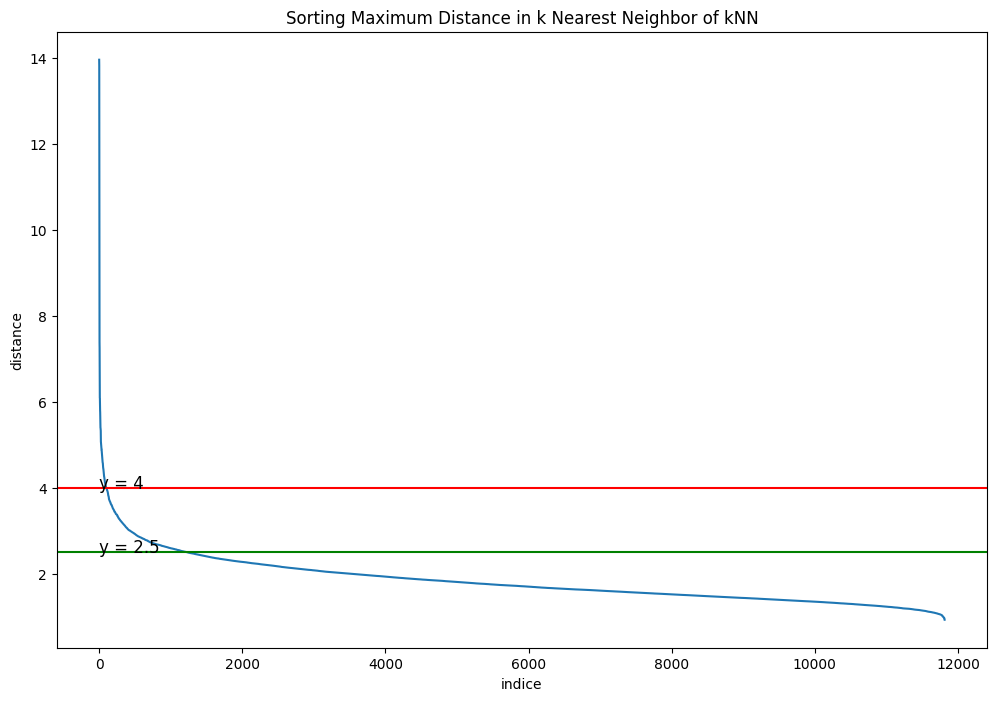

In [52]:
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=4,color='red')
plt.text(2, 4, 'y = 4',fontsize=12)
plt.axhline(y=2.5, color='green')
plt.text(2, 2.5, 'y = 2.5', fontsize=12)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

### T-SNE

5 5 5 5 4 4 4 3 3 3 3 3 

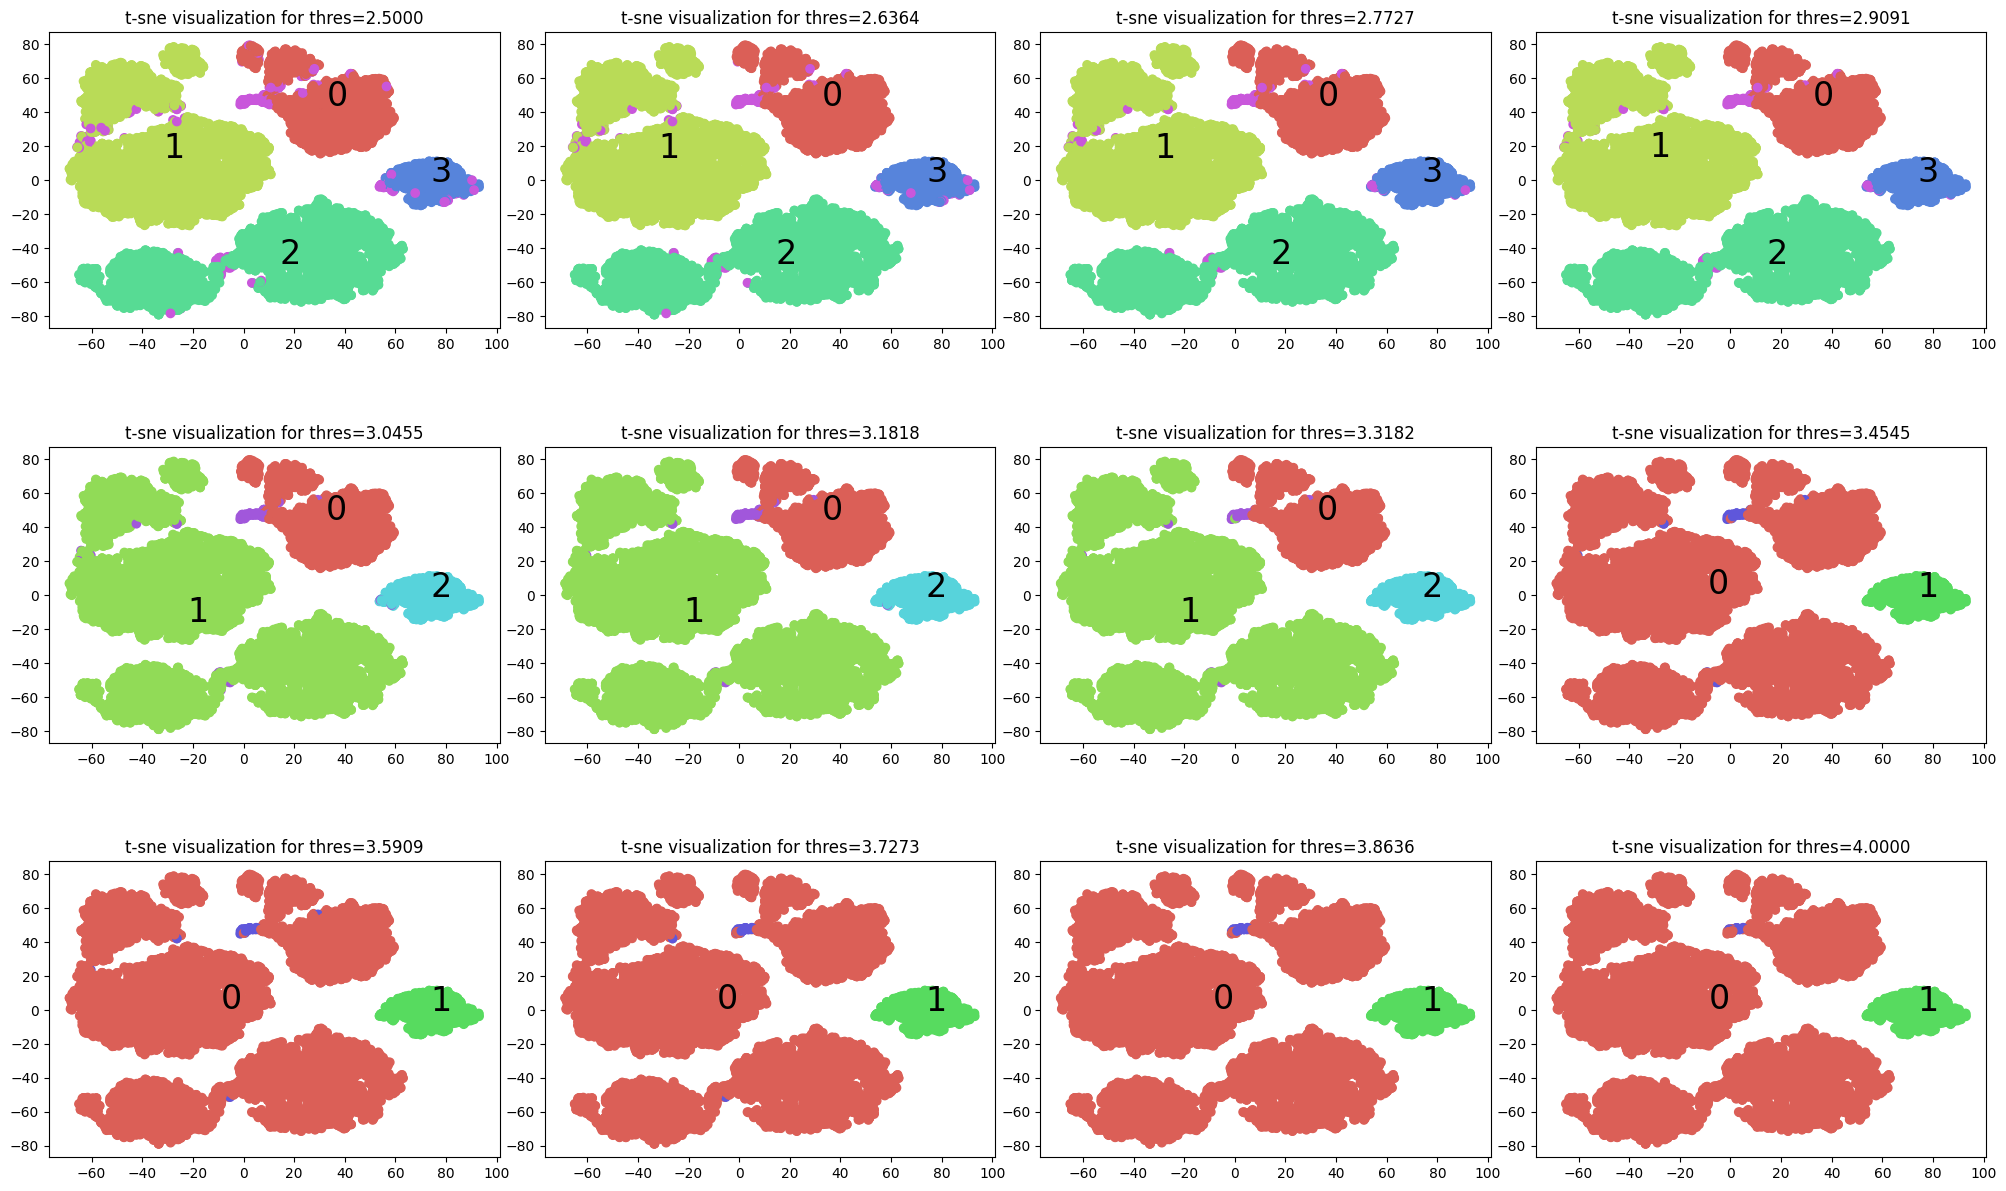

In [54]:
gs = GridSpec(4, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
tsne = TSNE(n_components=2, random_state=42).fit_transform(X_std)  
for i, thres in enumerate(np.linspace(2.5, 4, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    _plot_kmean_scatter(tsne , labels, gs[i], thres) 

```Nhận xét```
- eps = 2.6364 cho kết quả cụm rõ nhất

In [55]:
dbscan = DBSCAN(eps=2.6364, min_samples=neighbors+1)
dbscan.fit(X_std)
labels = dbscan.fit_predict(X_std) 

In [56]:
tsne1 = TSNE(n_components=2, random_state=42).fit_transform(X_std)
px.scatter(x=tsne1[:,0], y=tsne1[:,1], color=labels)

In [57]:
tsne2 = TSNE(n_components=3, random_state=42).fit_transform(X_std)
px.scatter_3d(x=tsne2[:,0], y=tsne2[:,1], z=tsne2[:,2], color=labels)

In [58]:
players_labels = players.copy()
players_labels['label'] = labels
cluster0 = players_labels[players_labels['label'] == 0]
cluster1 = players_labels[players_labels['label'] == 1]
cluster2 = players_labels[players_labels['label'] == 2]
cluster3 = players_labels[players_labels['label'] == 3] 
clusters = [cluster0, cluster1, cluster2, cluster3] 

## Khảo sát vị trí cầu thủ của từng cụm

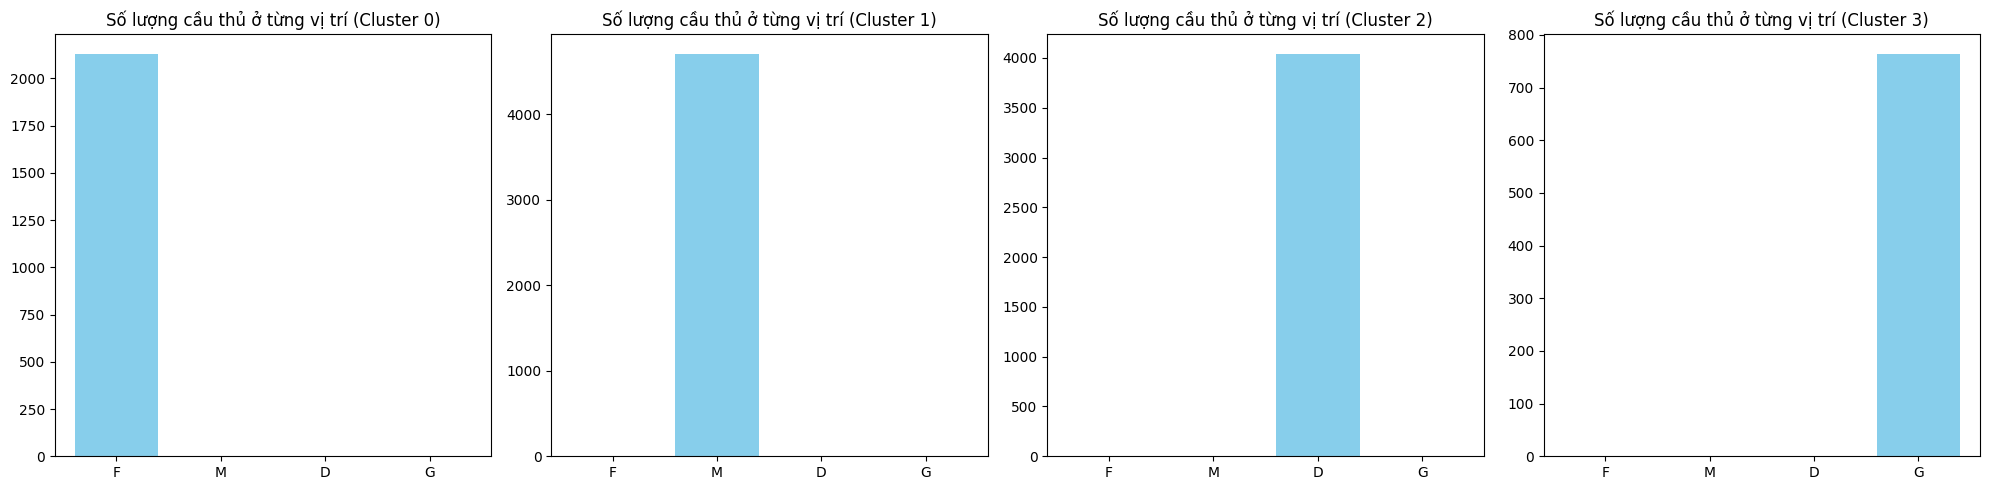

In [59]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 
for i, ax in enumerate(axs.flat):
    numberOfF = len(clusters[i][clusters[i]['pos_F'] == 1])
    numberOfM = len(clusters[i][clusters[i]['pos_M'] == 1])
    numberOfD = len(clusters[i][clusters[i]['pos_D'] == 1])
    numberOfG = len(clusters[i][clusters[i]['pos_G'] == 1])     

    ax.bar(['F', 'M', 'D', 'G'], [numberOfF, numberOfM, numberOfD, numberOfG], color='skyblue')
    ax.set_title(f'Số lượng cầu thủ ở từng vị trí (Cluster {i})')
plt.tight_layout()
plt.show()


## Khảo sát các chỉ số theo từng cụm

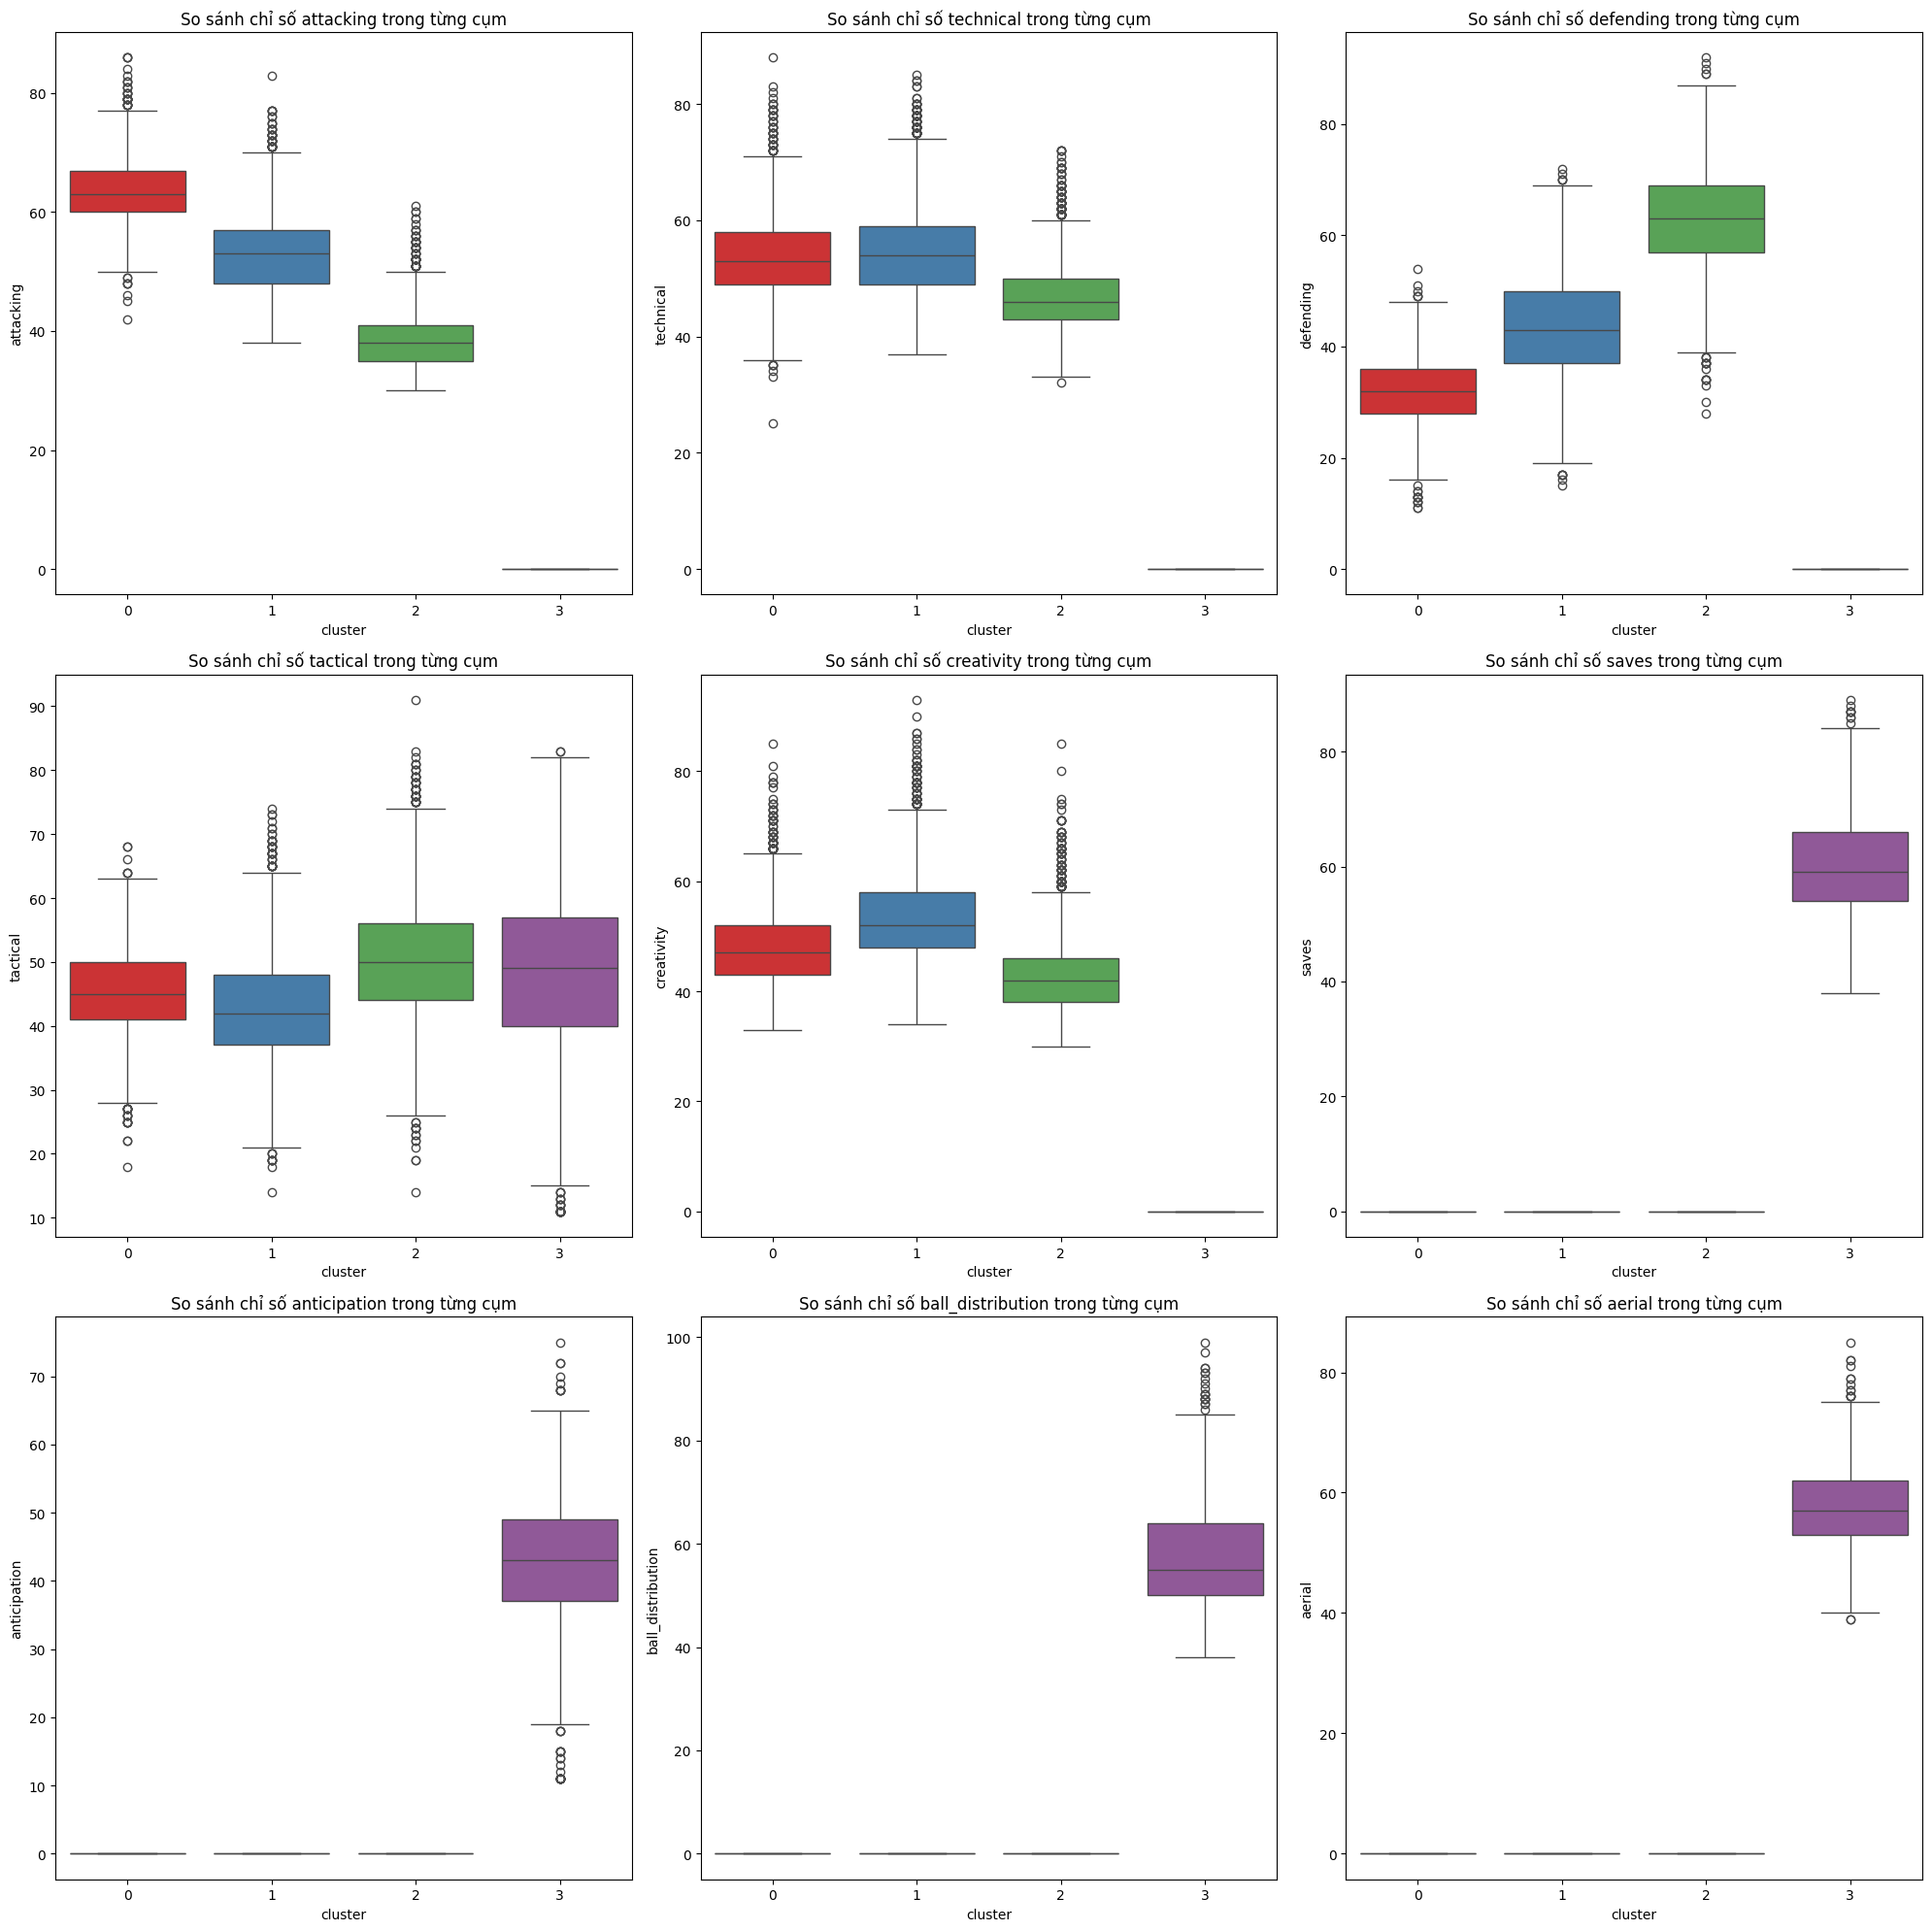

In [60]:
plt.figure(figsize=(20, 20))

# Vẽ boxplot cho chỉ số attacking trong từng cụm
plt.subplot(3, 3, 1)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='attacking', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số attacking trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('attacking')

# Vẽ boxplot cho chỉ số technical trong từng cụm
plt.subplot(3, 3, 2)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='technical', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số technical trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('technical')

# Vẽ boxplot cho chỉ số defending trong từng cụm
plt.subplot(3, 3, 3)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='defending', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số defending trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('defending')

# Vẽ boxplot cho chỉ số tactical trong từng cụm
plt.subplot(3, 3, 4)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='tactical', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số tactical trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('tactical')

# Vẽ boxplot cho chỉ số creativity trong từng cụm
plt.subplot(3, 3, 5)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='creativity', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số creativity trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('creativity')

# Vẽ boxplot cho chỉ số saves trong từng cụm
plt.subplot(3, 3, 6)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='saves', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số saves trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('saves')

# Vẽ boxplot cho chỉ số anticipation trong từng cụm
plt.subplot(3, 3, 7)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='anticipation', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số anticipation trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('anticipation')

# Vẽ boxplot cho chỉ số ball_distribution trong từng cụm
plt.subplot(3, 3, 8)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='ball_distribution', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số ball_distribution trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('ball_distribution')

# Vẽ boxplot cho chỉ số aerial trong từng cụm
plt.subplot(3, 3, 9)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='aerial', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số aerial trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('aerial')

plt.tight_layout()
plt.show()


## Khảo sát chân thuận, chiều cao

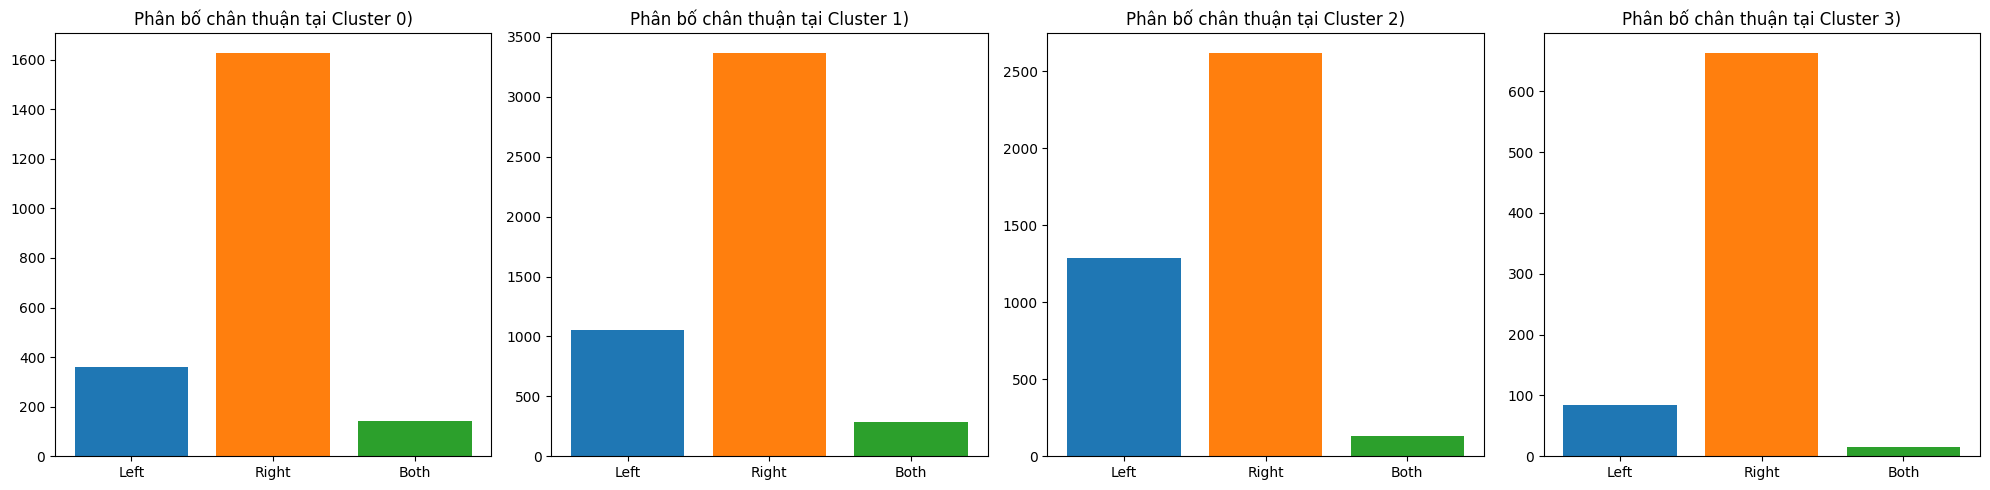

In [61]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 
for i, ax in enumerate(axs.flat):
    numberOfLeft = len(clusters[i][clusters[i]['preferred_foot'] == 1])
    numberOfRight = len(clusters[i][clusters[i]['preferred_foot'] == 2])
    numberOfBoth = len(clusters[i][clusters[i]['preferred_foot'] == 0])   

    ax.bar(['Left', 'Right', 'Both'], [numberOfLeft, numberOfRight, numberOfBoth], color=['#1f77b4', '#ff7f0e', '#2ca02c'])  
    ax.set_title(f'Phân bố chân thuận tại Cluster {i})')
plt.tight_layout()
plt.show()


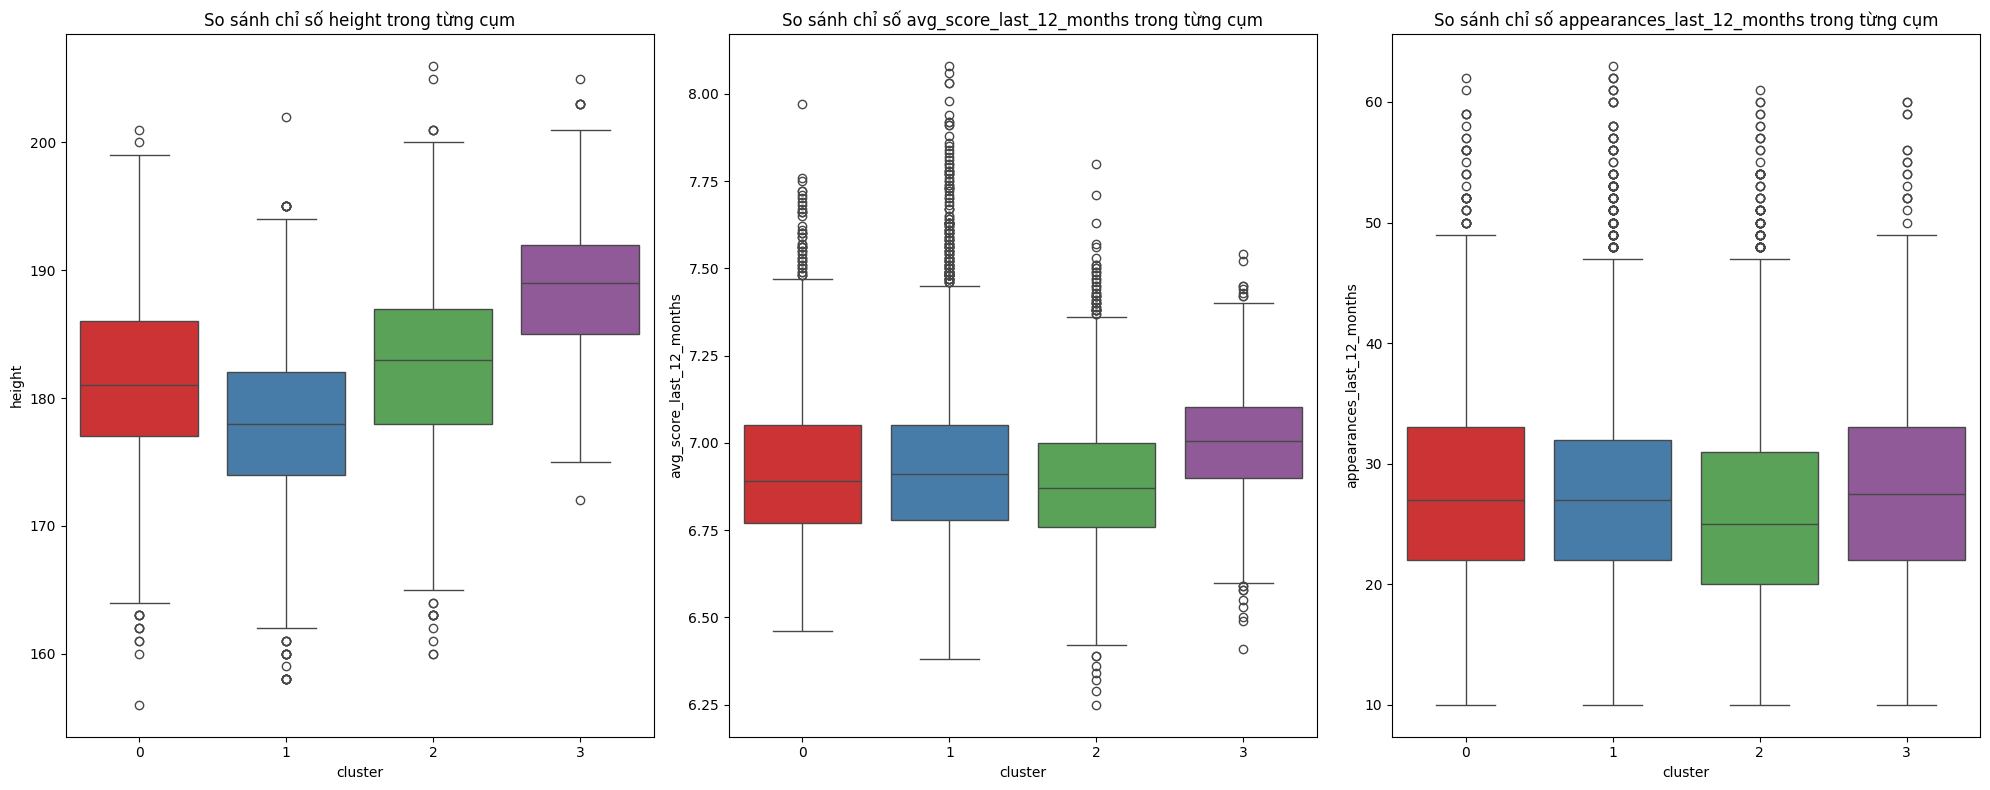

In [62]:
plt.figure(figsize=(20, 8))

# Vẽ boxplot cho chỉ số height trong từng cụm
plt.subplot(1, 3, 1)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='height', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số height trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('height')

# Vẽ boxplot cho chỉ số avg_score_last_12_months trong từng cụm
plt.subplot(1, 3, 2)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='avg_score_last_12_months', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số avg_score_last_12_months trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('avg_score_last_12_months')

# Vẽ boxplot cho chỉ số appearances_last_12_months trong từng cụm
plt.subplot(1, 3, 3)  # Chọn vị trí của subplot
sns.boxplot(x='label', y='appearances_last_12_months', data=players_labels[players_labels['label'].isin([0, 1, 2, 3])],palette='Set1',hue='label',legend=False)  
plt.title('So sánh chỉ số appearances_last_12_months trong từng cụm')
plt.xlabel('cluster')
plt.ylabel('appearances_last_12_months')

plt.tight_layout()
plt.show()